In [1]:
%matplotlib inline


In [2]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

best val: 2.0102
best params: {'tfidf__analyzer': 'word', 'tfidf__lowercase': False, 'tfidf__max_features': 552, 'rf__num_estimators': 469, 'rf__max_depth': 15, 'rf__min_samples_split': 17}


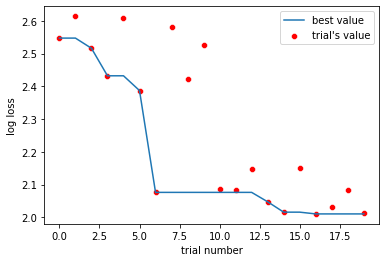

In [11]:
data = joblib.load('study.pkl')

df = data.trials_dataframe()
df.dropna(inplace=True)
df.reset_index(inplace=True)

df['time'] = (df.datetime_complete - df.datetime_start).dt.total_seconds()
df = df[df.time>=0]


print('best val:',  round(df.value.min(),4))
print('best params:',  data.best_params)

a = sns.lineplot(x=df.index, y=df.value.cummin())
a.set_xlabel('trial number')
sns.scatterplot(x=df.index, y=df.value, color='red')
a.set_ylabel('log loss')
a.legend(['best value', "trial's value"]);